<div align="center">

# Aprobación De Préstamos

<img src="imagenes/portada2.jpeg" width="30%">

Yerson Caleb Yarhui Sarate (yarhui.147382)  
Misael Redrejo Fernandez (redrejo.148361)

21 de diciembre de 2023

Aprendizaje Automático, UPNA  
</div>


## Índice
- [Descripcion del problema](#Descripcion-del-problema)
- [Carga y Lectura de los datos](#Carga-y-Lectura-de-los-datos)
   - [Manejo de errores](#Manejo-de-errores)
- [Visualizacion de Datos](#Visualizacion-de-Datos)
- [Preprocesamiento de Datos](#Preprocesamiento-de-Datos)
- [Construccion de modelos](#Construccion-de-modelos)
   - [Particionamiento de datos train/val/test](#Particionamiento-de-datos-train/val/test)
   - [Regresión logística](#Regresion-logistica)
      - [Con RFE](#Regresion-logistica-utilizando-RFE)
   - [Naive Bayes](#Naive-Bayes)
   - [Redes neuronales](#Redes-neuronales)
   - [K-means](#K-means)
   - [Ensembles](#Ensembles)
   - [OVA](#OVA)
   - [OVO](#OVO)
- [Conclusion](#Conclusion)
- [Posibles lineas de trabajo futuro para mejorar los resultados](#Posibles-lineas-de-trabajo-futuro-para-mejorar-los-resultados)

## Descripcion del problema
La toma de decisiones en la aprobación de préstamos constituye un desafío crítico en el ámbito financiero. La capacidad de evaluar con precisión la viabilidad de un solicitante para reembolsar un préstamo se ha vuelto cada vez más crucial para mitigar riesgos y garantizar la estabilidad financiera. En este contexto, la aplicación de técnicas de inteligencia artificial ofrece una solución prometedora al permitir una evaluación más precisa y automatizada de los solicitantes.

El objetivo central de este trabajo es explorar y aplicar diversas técnicas de aprendizaje automático para desarrollar modelos que predigan con precisión la aprobación o rechazo de préstamos. La justificación detrás de esta tarea radica en la necesidad de mejorar la eficiencia y eficacia de las decisiones crediticias, reduciendo el riesgo asociado a la concesión de préstamos.

El análisis de este conjunto de datos se llevará a cabo a través de varias etapas, incluyendo la carga y lectura de datos, manejo de errores, visualización de datos, preprocesamiento de datos y construcción de modelos. Se explorarán técnicas para posteriormente hacer un estudio y concluir un modelo que resuelva el problema en cuestión.

A través de este enfoque, se busca contribuir al avance de las metodologías de evaluación crediticia, brindando a las instituciones financieras herramientas más robustas y precisas para la toma de decisiones en la aprobación de préstamos.

El conjunto de datos proporcionado contiene información diversa sobre los solicitantes. En la siguiente tabla se muestra la información del dataset:

| Atributos                  | Descripción                                                  | Tipo de Dato |
|----------------------------|--------------------------------------------------------------|--------------|
| loan_id                    | El número de identificación único de cada solicitante.            | Integer      |
| no_of_dependents           | El número de dependientes que tiene el solicitante (personas que dependen económicamente de el solicitante).| Integer      |
| education                  | El nivel educativo del solicitante (graduado o  no). | Categórico, graduado:1, no graduado: 0   |
| self_employed              | Ya sea si el solicitante trabaja por cuenta propia o no (autónomo o no).| Categórico, autónomo:1, no autónomo:0   |
| income_annum               | Los ingresos anuales del solicitante.                         | Integer      |
| loan_amount                | El monto total solicitado para el préstamo.                     | Integer      |
| loan_term                  | La duración, en años, dentro de la cual se debe reembolsar el préstamo. | Integer      |
| cibil_score                | Puntaje de crédito del solicitante. Prever si el solicitante será capaz de devolver el préstamo en función de lo que ha ocurrido en circunstancias parecidas con solicitantes de un perfil similar, ya que el scoring se basa en la estadística.| Integer, Deficiente: 300-549, Regular: 550-649, Bueno: 650-749, Muy bueno: 750-799, Excelente: 800-900      |
| residential_assets_value   | El valor total de los activos residenciales del solicitante.        | Integer      |
| commercial_assets_value    | El valor total de los activos comerciales del solicitante.         | Integer      |
| luxury_assets_value        | El valor total de los bienes de lujo del solicitante.             | Integer      |
| bank_asset_value           | El valor total de los activos bancarios del solicitante.              | Integer      |
| loan_status                | Variable objetivo. Describe si el préstamo fue aprobado o no. | Categórico, aprobado:1, rechazado: 0   |


## Carga y Lectura de los datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE



from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42) # para la reproductibilidad



In [2]:
data = pd.read_csv('datos/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Manejo de errores

In [3]:
for key in data.columns.tolist():
    print('La columna', key, ' contiene valores:\n')
    print(np.unique(data[key]))
    print()

La columna loan_id  contiene valores:

[   1    2    3 ... 4267 4268 4269]

La columna  no_of_dependents  contiene valores:

[0 1 2 3 4 5]

La columna  education  contiene valores:

[' Graduate' ' Not Graduate']

La columna  self_employed  contiene valores:

[' No' ' Yes']

La columna  income_annum  contiene valores:

[ 200000  300000  400000  500000  600000  700000  800000  900000 1000000
 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000 1900000
 2000000 2100000 2200000 2300000 2400000 2500000 2600000 2700000 2800000
 2900000 3000000 3100000 3200000 3300000 3400000 3500000 3600000 3700000
 3800000 3900000 4000000 4100000 4200000 4300000 4400000 4500000 4600000
 4700000 4800000 4900000 5000000 5100000 5200000 5300000 5400000 5500000
 5600000 5700000 5800000 5900000 6000000 6100000 6200000 6300000 6400000
 6500000 6600000 6700000 6800000 6900000 7000000 7100000 7200000 7300000
 7400000 7500000 7600000 7700000 7800000 7900000 8000000 8100000 8200000
 8300000 8400000 850000

A primera vista parece que no hay valores vacíos ni con valores inf o naN o None, pero para asegurarnos:

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Se renombre el nombre de las columnas ya que algunos contienen espacios antes de el nombre.

In [5]:
print(data.columns)
data.rename(columns=lambda x: x.replace(" ", ""), inplace=True)
print(data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


## Visualizacion de Datos

In [6]:
def muestraGraficaPastel(val, counts, c1, c2, title):
    plt.figure(figsize=(6, 6))
    plt.pie(
        val,
        labels=counts.index,
        autopct=lambda p: '{:.2f}%\n Con {:.0f} solicitantes '.format(p, p/100 * np.sum(counts.values)),
        textprops=dict(color="black"),
        colors=[c1, c2],
        startangle=90
    )
    plt.title(title)
    plt.show()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


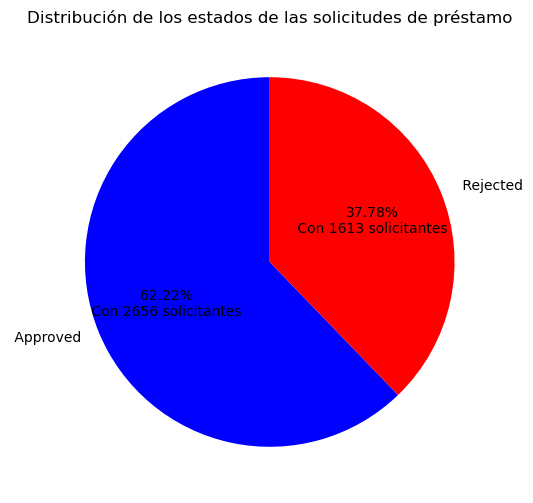

In [7]:
loan_status_counts = data['loan_status'].value_counts()
print(loan_status_counts)
muestraGraficaPastel(
    (loan_status_counts.values * 100) / np.sum(loan_status_counts.values),
    loan_status_counts,
    'blue',
    'red',
    'Distribución de los estados de las solicitudes de préstamo'
)

# <a id='solicitudes'></a>

Comprobamos que en nuestro dataset un 62.22% de solicitantes tienen la solicitud aprobada, y un 37.78% no ha conseguido aprobarla.

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64


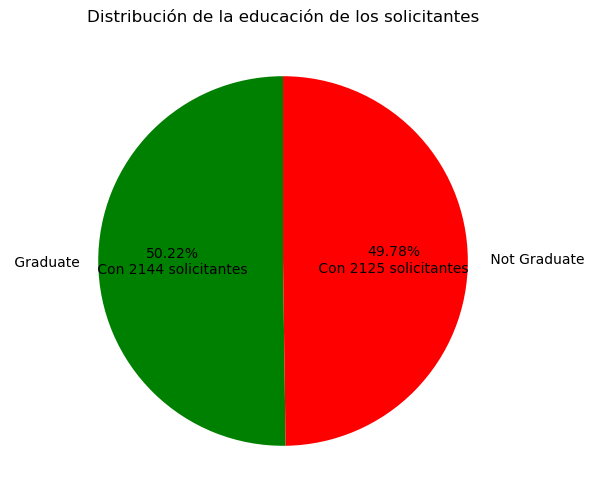

In [8]:
education_counts = data['education'].value_counts()
print(education_counts)
muestraGraficaPastel(
    (education_counts.values * 100) / np.sum(education_counts.values),
    education_counts,
    'green',
    'red',
    'Distribución de la educación de los solicitantes'
)

El número de solicitantes que son graduados y no graduados es casi similar.

 Yes    2150
 No     2119
Name: self_employed, dtype: int64


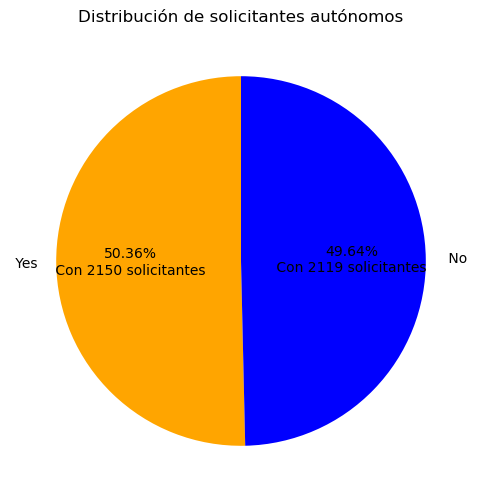

In [9]:
self_employed_counts = data['self_employed'].value_counts()
print(self_employed_counts)
muestraGraficaPastel(
    (self_employed_counts.values * 100) / np.sum(self_employed_counts.values),
    self_employed_counts,
    'orange',
    'blue',
    'Distribución de solicitantes autónomos'
)

El número de solicitantes autónomos es similar al de empleados.

4    752
3    727
0    712
2    708
1    697
5    673
Name: no_of_dependents, dtype: int64


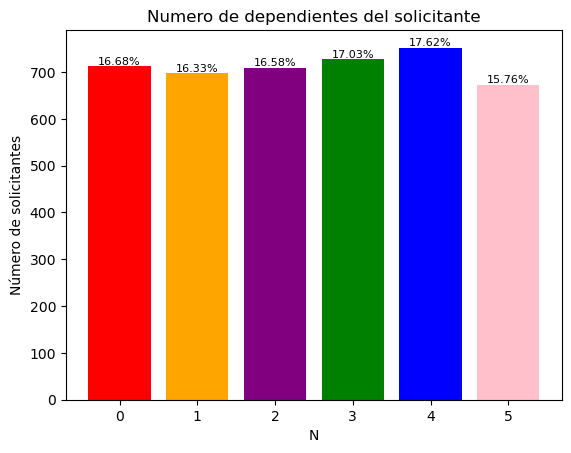

In [10]:
no_of_dependents_counts = data['no_of_dependents'].value_counts()
print(no_of_dependents_counts)
plt.bar(no_of_dependents_counts.index, no_of_dependents_counts.values, color= ['blue', 'green', 'red', 'purple', 'orange', 'pink'])
total = sum(no_of_dependents_counts.values)
for category, value in zip(no_of_dependents_counts.index, no_of_dependents_counts.values):
    percentage = (value / total) * 100
    plt.text(category, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)
plt.title('Numero de dependientes del solicitante')
plt.xlabel('N')
plt.ylabel('Número de solicitantes')
plt.show()

Tenemos casi el mismo número de solicitantes que tienen a 0 personas que dependen económicamente de ellos que hasta 5 personas dependientes de ellos.

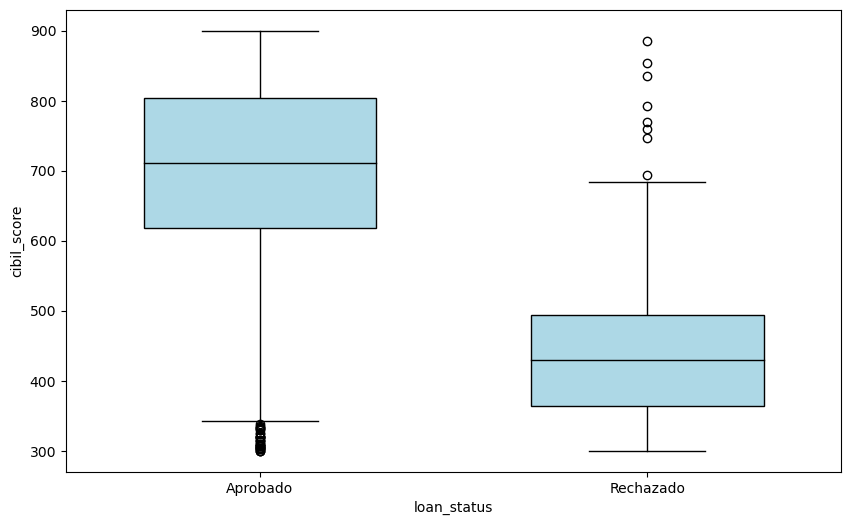

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [data[data['loan_status'] == ' Approved']['cibil_score'],
    data[data['loan_status'] == ' Rejected']['cibil_score']],
    labels=['Aprobado', 'Rechazado'],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='black')
)
plt.xlabel('loan_status')
plt.ylabel('cibil_score')
plt.show()

Es decir, el puntuaje que tiene un solicitante de cumplir sus obligaciones y responsabilidades crediticias repercute mucho en si el préstamo va a ser aceptado o rechazado.

   loan_status  loan_term   loan_amount
0     Approved          2  1.526381e+07
1     Approved          4  1.538415e+07
2     Approved          6  1.461738e+07
3     Approved          8  1.377455e+07
4     Approved         10  1.615677e+07
5     Approved         12  1.656449e+07
6     Approved         14  1.516025e+07
7     Approved         16  1.518559e+07
8     Approved         18  1.535097e+07
9     Approved         20  1.475212e+07
10    Rejected          2  1.336742e+07
11    Rejected          4  1.297284e+07
12    Rejected          6  1.525288e+07
13    Rejected          8  1.542590e+07
14    Rejected         10  1.599130e+07
15    Rejected         12  1.414556e+07
16    Rejected         14  1.573494e+07
17    Rejected         16  1.494716e+07
18    Rejected         18  1.432667e+07
19    Rejected         20  1.526400e+07


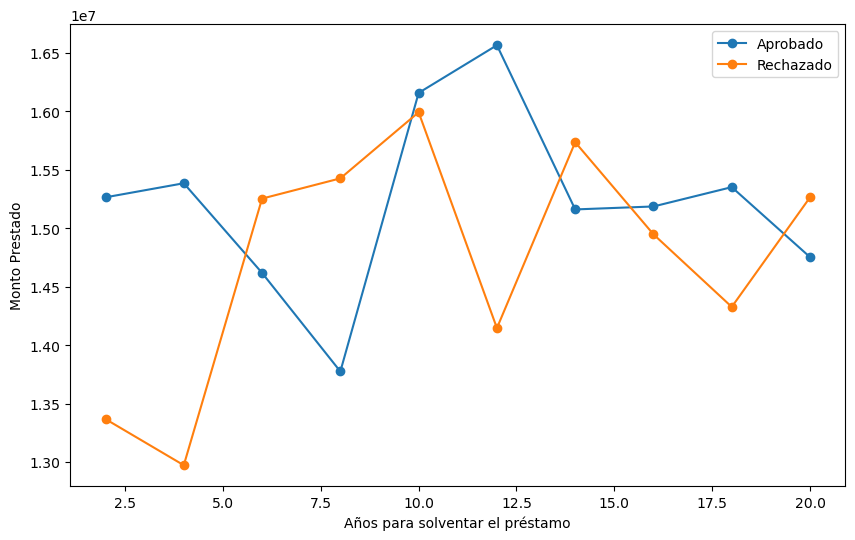

    loan_term loan_status  loan_amount
0           2    Approved   4808100000
1           2    Rejected   1189700000
2           4    Approved   5630600000
3           4    Rejected   1050800000
4           6    Approved   4122100000
5           6    Rejected   3172600000
6           8    Approved   3030400000
7           8    Rejected   2560700000
8          10    Approved   3699900000
9          10    Rejected   3310200000
10         12    Approved   4571800000
11         12    Rejected   2546200000
12         14    Approved   3623300000
13         14    Rejected   2612000000
14         16    Approved   3583800000
15         16    Rejected   2630700000
16         18    Approved   3945200000
17         18    Rejected   2363900000
18         20    Approved   3481500000
19         20    Rejected   2671200000


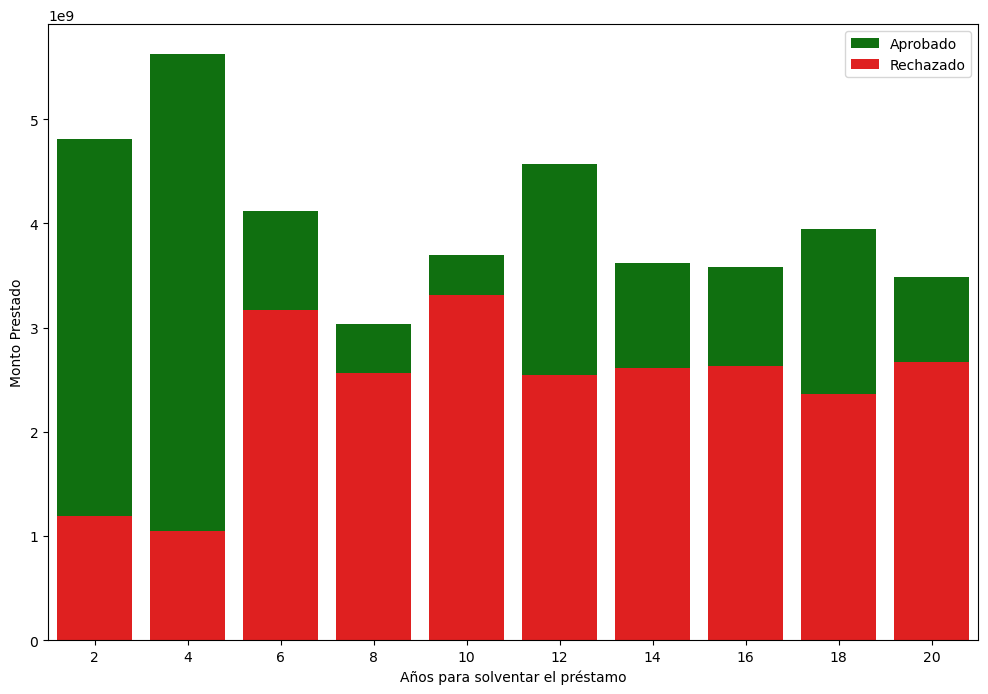

In [12]:
grouped_data = data.groupby(['loan_status', 'loan_term'])['loan_amount'].mean().reset_index()
print(grouped_data)
approved_data = grouped_data[grouped_data['loan_status'] == ' Approved']
rejected_data = grouped_data[grouped_data['loan_status'] == ' Rejected']
plt.figure(figsize=(10, 6))
plt.plot(approved_data['loan_term'], approved_data['loan_amount'], label='Aprobado', marker='o')
plt.plot(rejected_data['loan_term'], rejected_data['loan_amount'], label='Rechazado', marker='o')
plt.xlabel('Años para solventar el préstamo')
plt.ylabel('Monto Prestado')
plt.legend()
plt.show()

grouped_data = data.groupby(['loan_term', 'loan_status'])['loan_amount'].sum().reset_index()
print(grouped_data)
approved_data = grouped_data[grouped_data['loan_status'] == ' Approved']
rejected_data = grouped_data[grouped_data['loan_status'] == ' Rejected']
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='loan_term', y='loan_amount', data=approved_data, color='green', label='Aprobado', ax=ax)
sns.barplot(x='loan_term', y='loan_amount', data=rejected_data, color='red', label='Rechazado', ax=ax)
ax.set_xlabel('Años para solventar el préstamo')
ax.set_ylabel('Monto Prestado')
ax.legend()
plt.show()

Se observa que las solicitudes con montos pequeños y un extenso período para su devolución tienden a ser rechazadas con mayor frecuencia. En cambio si se pagan rápidamente entonces tienden a aceptarla.

loan_status     Approved   Rejected
education                          
 Graduate           1339        805
 Not Graduate       1317        808


<Figure size 800x600 with 0 Axes>

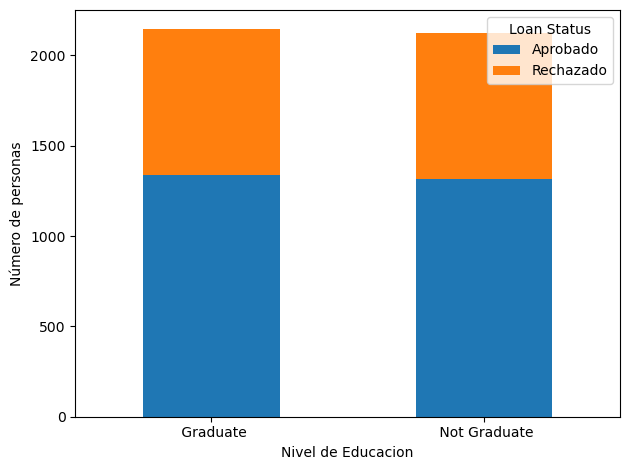

In [13]:
education_loan_status_counts = data.groupby(['education', 'loan_status']).size().unstack()
print(education_loan_status_counts)
plt.figure(figsize=(8, 6))
education_loan_status_counts.plot(kind='bar', stacked=True)
plt.xlabel('Nivel de Educacion')
plt.ylabel('Número de personas')
plt.legend(title='Loan Status', loc='upper right', labels=['Aprobado', 'Rechazado'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

En cambio el nivel de educación no repercute tanto en si va a ser aceptado o rechazado puesto que ambos grupos, graduados y no graduados, tienen números similares de solicitantes aceptados y rechazados.

-Existen x_asset_value negativos, significará que tienen deuda en esa columna por alguna razón.

In [14]:
mascaraDeDeudas = (data['residential_assets_value'] < 0) | (data['bank_asset_value'] < 0) | (data['commercial_assets_value'] < 0) | (data['luxury_assets_value'] < 0)
numeroDeClientesEnDeudas = data[mascaraDeDeudas].shape[0]
numeroDeClientesConDeudaAprobados = data[mascaraDeDeudas & (data['loan_status'] == ' Approved')].shape[0]
numeroDeClientesConDeudaRechazados = numeroDeClientesEnDeudas-numeroDeClientesConDeudaAprobados
print('Numero de clientes que tienen alguna deuda en algún asset_value: ',numeroDeClientesEnDeudas, ', \nNumero de clientes que tienen alguna deuda en algún asset_value y que tienen el prestamo aprobado: ', numeroDeClientesConDeudaAprobados, ',  \nNumero de clientes que tienen alguna deuda en algún asset_value y que tienen el prestamo rechazado: ', numeroDeClientesConDeudaRechazados)

Numero de clientes que tienen alguna deuda en algún asset_value:  28 , 
Numero de clientes que tienen alguna deuda en algún asset_value y que tienen el prestamo aprobado:  16 ,  
Numero de clientes que tienen alguna deuda en algún asset_value y que tienen el prestamo rechazado:  12


Estudiando los datos en general sin distinguir ningúna columna de los asset values se aprecia que no tiene que ver tener una deuda para poder tener un nuevo préstamo aprobado.

In [15]:
df = data[mascaraDeDeudas & (data['loan_status'] == ' Approved')]
dsumApproved = np.mean(df['residential_assets_value'])+np.mean(df['bank_asset_value'])+np.mean(df['commercial_assets_value'])+np.mean(df['luxury_assets_value'])
df = data[mascaraDeDeudas & (data['loan_status'] == ' Rejected')]
dsumRejected = np.mean(df['residential_assets_value'])+np.mean(df['bank_asset_value'])+np.mean(df['commercial_assets_value'])+np.mean(df['luxury_assets_value'])#df['residential_assets_value']+df['bank_asset_value']+df['commercial_assets_value']+df['luxury_assets_value']
print('Suma de las medias de columnas de los asset que han sido aprobados: ', dsumApproved, ', \nSuma de las medias de columnas de los asset que han sido rechazado: ',dsumRejected)
s = dsumApproved+dsumRejected
print('Las personas que tienen menos valor activo del total, un {}% de valor activo del total de las personas que tienen deudas,  son rechazadas, \nen cambio, los que tienen un  {}% del valor activo total de personas con deuda, es decir, que tienen más valor activo del total son aceptadas'.format(round((dsumRejected/s) * 100, 2), round((dsumApproved/s)*100, 2)))

Suma de las medias de columnas de los asset que han sido aprobados:  18637500.0 , 
Suma de las medias de columnas de los asset que han sido rechazado:  8100000.0
Las personas que tienen menos valor activo del total, un 30.29% de valor activo del total de las personas que tienen deudas,  son rechazadas, 
en cambio, los que tienen un  69.71% del valor activo total de personas con deuda, es decir, que tienen más valor activo del total son aceptadas


En cambio, encontramos significado a la aceptación o rechazo de los préstamos solicitados de personas que tienen deuda, si estas, a pesar de tener alguna deuda, tiene un buen monto de valores activos indica que tiene mejores probabilidades de tener un préstamo aceptado, a diferencia de alguien que tiene un bajo monto de valores activos con respecto a las personas que tiene deudas.

## Preprocesamiento de Datos

In [16]:
dataOriginal = data.copy()

Primero vamos a cambiar los Yes, Graduate, Approved:1, No, Not Graduate, Rejected:0

In [17]:
label_encoders = {}
categorical_features = ['education', 'self_employed', 'loan_status']
for column in categorical_features:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
for column, encoder in label_encoders.items():
    print(f"Mapping of classes for {column}:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
categorical_features = categorical_features[:-1]

Mapping of classes for education: {' Graduate': 0, ' Not Graduate': 1}
Mapping of classes for self_employed: {' No': 0, ' Yes': 1}
Mapping of classes for loan_status: {' Approved': 0, ' Rejected': 1}


Con scikit learn las columnas education y loan_status me las ha codificado al revés, entonces los intercambiaré.

In [18]:
data['education'], data['loan_status'] = 1-data['education'], 1-data['loan_status']
##
print('DATOS ORIGINALES: \n', dataOriginal.head())
print('DATOS PREPROCESADOS: \n', data.head())

DATOS ORIGINALES: 
    loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             2

Ahora vamos a transformar los datos numéricos a dos tipos de estandarizaciones, $z = \frac{{x - \mu}}{{\sigma}}$, donde calcula la media y la desviación estándar de los datos y escala los valores de manera que tengan una media de 0 y una desviación estándar de 1, y $x' = \frac{{x - mín}}{{máx-mín}}$ que resulta en una distribución donde los valores originales se escalan al rango [0, 1].

In [19]:
X = data.drop(columns=['loan_id', 'loan_status']) # Quitamos el id que no aporta información relevante y el valor a predecir y
y = data['loan_status']
X_MinMax, X_Z = X.copy(), X.copy()
scalerMinMax, scalerZ = MinMaxScaler(), StandardScaler()
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                         'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                         'bank_asset_value']
X_Z[numerical_features], X_MinMax[numerical_features] = scalerZ.fit_transform(X[numerical_features]), scalerMinMax.fit_transform(X[numerical_features])

nombres_atributos = X.columns

print(f'Nombres de los atributos: {nombres_atributos.values}')

print(X_Z[:3])
print(X_MinMax[:3])
print(y[:3])

Nombres de los atributos: ['no_of_dependents' 'education' 'self_employed' 'income_annum'
 'loan_amount' 'loan_term' 'cibil_score' 'residential_assets_value'
 'commercial_assets_value' 'luxury_assets_value' 'bank_asset_value']
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          1              0      1.617979     1.633052   
1         -1.473548          0              1     -0.341750    -0.324414   
2          0.295621          1              0      1.439822     1.610933   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   

   luxury_assets_value  bank_asset_value  
0             0.832028          0.930304  
1            -0.694993         -0.515936  
2             1.996

In [20]:
# Quitamos los nombres de los atributos de las columnas
X_Z = X_Z.values
X_MinMax = X_MinMax.values
y = y.values

print(X_Z[:3])
print(X_MinMax[:3])
print(y[:3])

[[-0.2941017   1.          0.          1.61797904  1.63305171  0.19261651
   1.03279241 -0.78005754  2.877289    0.83202837  0.93030441]
 [-1.4735476   0.          1.         -0.34174956 -0.32441406 -0.50809068
  -1.06105118 -0.7339241  -0.63192107 -0.69499321 -0.51593638]
 [ 0.29562125  1.          0.          1.4398219   1.61093345  1.59403089
  -0.54484044 -0.05730028 -0.10781827  1.99651964  2.40731629]]
[[0.4        1.         0.         0.96907216 0.75510204 0.55555556
  0.79666667 0.08561644 0.90721649 0.57583548 0.54421769]
 [0.         0.         1.         0.40206186 0.30357143 0.33333333
  0.195      0.09589041 0.11340206 0.218509   0.2244898 ]
 [0.6        1.         0.         0.91752577 0.75       1.
  0.34333333 0.24657534 0.23195876 0.84832905 0.8707483 ]]
[1 0 0]


### Construccion de modelos

### Particionamiento de datos train/val/test
Dividimos los datos en conjuntos de entrenamiento de entrenamiento, de evaluación para escoger los hiperparámetros y de testeo para estudiar la generalización de los modelos que se estudiarán en los siguientes apartados.
Como se ha observado en el apartado [Visualizacion de Datos](#solicitudes), el 62.22% de solicitantes tienen la solicitud aprobada, y un 37.78% no, por ello vamos a aplicar estratificación a los datos para entrenar los modelos equilibradamente con un 50% de clase aprobados y un 50% de no aprobados.
Vamos a emplear un 60% de los datos para train los restantes para el conjunto de validación y test. Seguidamente separaremos esos datos restantes en un 50% para validación y un 50% para test.

In [21]:
def get_partitions(X, y, size_val_test = 0.4, size_test = 0.5, random_state=42):
    '''
    Realizamos una función para el particionamiento de los datos.
    Params:
    X: matriz de datos
    y: vector de salida
    size_val_test: proporción de datos para val_test y train
    size_test: proporción para testeo y val.
    random_state: para obtener siempre la misma distribución
    '''
    X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=size_val_test, stratify = y, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=size_test, random_state=random_state)
    return X_train, X_test, X_val, y_train, y_test, y_val


In [22]:
# Para cada estandarizaión hacemos uso de la función definida en la celda anterior:
X_train_Z, X_test_Z, X_val_Z, y_train_Z, y_test_Z, y_val_Z = get_partitions(X_Z, y)
X_train_MinMax, X_test_MinMax, X_val_MinMax, y_train_MinMax, y_test_MinMax, y_val_MinMax = get_partitions(X_MinMax, y)

# Generamos un diccionario para los datos estandarizados que contengan en una tupla los valores:
# (X_train, X_val, X_test, y_train, y_val, t_test)
dataset = {}
dataset['Z'] = (X_train_Z, X_val_Z, X_test_Z, y_train_Z, y_val_Z, y_test_Z)
dataset['MinMax'] = (X_train_MinMax, X_val_MinMax, X_test_MinMax, y_train_MinMax, y_val_MinMax, y_test_MinMax)

print(dataset['Z'][0][:5])
print(dataset['MinMax'][0][:5])
print(y[:5])

[[ 0.8853442   1.          1.         -0.09232955 -0.57877402  0.54297011
   1.03859253 -0.34947875  0.98596149  0.38161193 -0.63902071]
 [ 0.29562125  0.          0.          0.05019616  0.22854237  1.2436773
   0.9747912   0.26563382  0.12005251 -0.37640598 -0.36208098]
 [-0.88382465  0.          0.         -1.125641   -0.88842962 -1.55915146
   1.35759917 -0.54939033 -0.609134   -1.02456622 -1.10058692]
 [-0.2941017   1.          1.         -0.16359241 -0.28017754 -1.55915146
  -1.42065867 -0.18032279  0.43907161 -0.03584721  0.4687382 ]
 [ 1.47506715  0.          0.          1.58234761  0.7814988   1.59403089
  -1.43805903  2.61843937 -1.1332368   1.72187547  0.6225936 ]]
[[0.8        1.         1.         0.4742268  0.24489796 0.66666667
  0.79833333 0.18150685 0.47938144 0.47043702 0.19727891]
 [0.6        0.         0.         0.51546392 0.43112245 0.88888889
  0.78       0.31849315 0.28350515 0.29305913 0.2585034 ]
 [0.2        0.         0.         0.17525773 0.17346939 0.
  0

### Regresion logistica
Vamos a entrenar un modelo con regresión logística para analizar los mejores hiperparámetros que resuelvan el problema.
Para ello vamos a hacer uso de [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) de scikit-learn, con ello conseguiremos la mejor combinación de grado de polinomio y parámetro de regularización lambda.

In [23]:
X_train, X_test, X_val, y_train, y_test, y_val = dataset['Z']

# Scikit learn realizará la validación cruzada en GridSearch con los datos de entrenamiento así que los concatenamos
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# Creamos las variables lambda_vec y grados_vec para obtener los mejores hiperparámetros
lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
grados_vec = np.arange(1, 4)

# Modelo de regresión logística polinómica
reg_log_polynomial = make_pipeline(PolynomialFeatures(), LogisticRegression(solver='newton-cg', max_iter=600))

# Parámetros para el GridSearch
param_grid = {
    'polynomialfeatures__degree': grados_vec,
    'logisticregression__C': 1/lambda_vec # C es el inverso del parámetro de regularización lambda
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    reg_log_polynomial,
    param_grid,
    cv=5,  # Número de folds para la validación cruzada
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

C:\Users\Misa\AppData\Local\Temp\ipykernel_31156\2694144175.py:17: RuntimeWarning: divide by zero encountered in true_divide
  'logisticregression__C': 1/lambda_vec # C es el inverso del parámetro de regularización lambda


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=600,
                                                           solver='newton-cg'))]),
             param_grid={'logisticregression__C': array([           inf, 1.00000000e+03, 3.33333333e+02, 1.00000000e+02,
       3.33333333e+01, 1.00000000e+01, 3.33333333e+00, 1.00000000e+00,
       3.33333333e-01, 1.00000000e-01]),
                         'polynomialfeatures__degree': array([1, 2, 3])},
             scoring='accuracy')

Una vez entrenado el modelo vamos a observar los resultados obtenidos con la librería 'pandas'.

Lambda                              0.000     0.001     0.003     0.010   \
param_polynomialfeatures__degree                                           
1                                 0.918887  0.918887  0.918887  0.918887   
2                                 0.949341  0.949048  0.949048  0.948755   
3                                 0.934700  0.939678  0.940849  0.940556   

Lambda                              0.030     0.100     0.300     1.000   \
param_polynomialfeatures__degree                                           
1                                 0.918887  0.919180  0.919180  0.918302   
2                                 0.949634  0.950512  0.949048  0.945242   
3                                 0.945534  0.945827  0.949048  0.950512   

Lambda                              3.000     10.000  
param_polynomialfeatures__degree                      
1                                 0.918302  0.917423  
2                                 0.942020  0.937335  
3                 

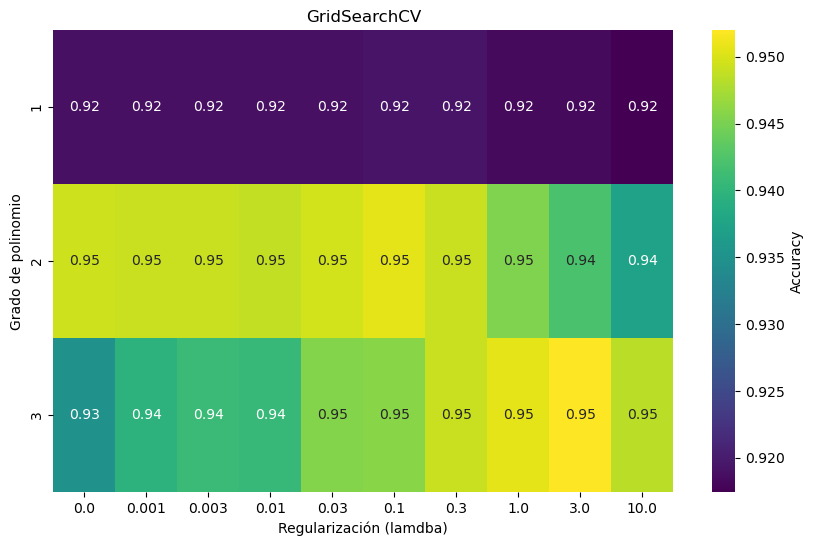

Mejores parámetros: {'logisticregression__C': 0.3333333333333333, 'polynomialfeatures__degree': 3}
Mejor accuracy: 0.9519765739385064
Porcentaje de acierto en los datos de prueba para el modelo con los mejores hiperparámetros: 94.85%


In [24]:
# Realizamos una función para poder reutilizar el código posteriormente
def mostrar_panda_y_graf(grid_search):
    # Obtemos los resultados del GridSearchCV
    results = pd.DataFrame(grid_search.cv_results_)

    # Filtramos las columnas relevantes
    columns_of_interest = ['param_logisticregression__C', 'param_polynomialfeatures__degree', 'mean_test_score']
    results_filtered = results[columns_of_interest].copy()

    # Renombramos la columna de 'param_logisticregression__C' a 'Lambda'
    results_filtered = results_filtered.rename(columns={'param_logisticregression__C': 'Lambda'})

    # Conseguimos lambda haciendo el inverso de C
    results_filtered['Lambda'] = 1 / results_filtered['Lambda']

    # Pivotea la tabla para obtener una mejor visualización
    table = pd.pivot_table(results_filtered, values='mean_test_score', index='param_polynomialfeatures__degree', columns='Lambda')

    print(table)

    plt.figure(figsize=(10, 6))
    sns.heatmap(table, annot=True, cmap='viridis', cbar_kws={'label': 'Accuracy'})
    plt.title('GridSearchCV')
    plt.xlabel('Regularización (lamdba)')
    plt.ylabel('Grado de polinomio')
    plt.show()


mostrar_panda_y_graf(grid_search)


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Porcentaje de acierto en los datos de prueba para el modelo con los mejores hiperparámetros: {round(accuracy * 100, 2)}%')

Se puede observar que los mejores hiperparámetros encontrados fueron un grado de polinómio 3 y un valor de C de 0.33 lo que implica un valor de lamdba 3.
En la fase de testeo en el que obtenemos la capacidad de generalización del modelo se obtiene un porcentaje de acierto de 94.85%.

### Regresion logistica utilizando RFE
Debido a que el dataset original contiene 11 atributos es inviable generar un modelo de regresión logística con un grado de polinomio alto, por ello vamos a reducir el número de características utilizando la técnica [`RFE`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) que aporta scikit-learn. Posteriormente aplicaremos grados de polinomio altos y observaremos si mejora la capacidad del nuevo modelo en generalizar y clasificar correctamente nuevos datos.

In [25]:
# Número de características a seleccionar
n_features_to_select = 5

reg_log_polynomial = make_pipeline(PolynomialFeatures(), LogisticRegression(solver='newton-cg', max_iter=400))

# Ajustamos el modelo antes de usarlo en RFE
reg_log_polynomial.fit(X_train, y_train)

# Obtiene el modelo de regresión logística polinómica del paso final de la canalización
# Paso necesario para la selección de características de RFE
logistic_regression_model = reg_log_polynomial.named_steps['logisticregression']

# Seleccionador de características RFE
rfe = RFE(estimator=logistic_regression_model, n_features_to_select=n_features_to_select)

# Aplica RFE y ajusta el modelo
X_train_rfe = rfe.fit_transform(X_train, y_train)

selected_features = [i for i, selected in enumerate(rfe.support_) if selected]
print("Características seleccionadas: ", nombres_atributos[selected_features])

# Generamos nuevos grados de polinomios
grados_vec = np.arange(1, 7)
# Ya que con lambda = 0 es dificil converger, ponemos valores muy pequeños cercanos al 0
lambda_vec = np.array([0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

param_grid = {
    'polynomialfeatures__degree': grados_vec,
    'logisticregression__C': 1 / lambda_vec # C es el inverso del parámetro de regularización lambda
}

grid_search = GridSearchCV(
    reg_log_polynomial,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_rfe, y_train)


Características seleccionadas:  Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'luxury_assets_value'],
      dtype='object')


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=400,
                                                           solver='newton-cg'))]),
             param_grid={'logisticregression__C': array([1.00000000e+04, 3.33333333e+03, 1.00000000e+03, 3.33333333e+02,
       1.00000000e+02, 3.33333333e+01, 1.00000000e+01, 3.33333333e+00,
       1.00000000e+00, 3.33333333e-01, 1.00000000e-01]),
                         'polynomialfeatures__degree': array([1, 2, 3, 4, 5, 6])},
             scoring='accuracy')

Mejores parámetros: {'logisticregression__C': 33.333333333333336, 'polynomialfeatures__degree': 5}
Mejor accuracy: 0.9765739385065885
Lambda                             0.0001    0.0003    0.0010    0.0030   \
param_polynomialfeatures__degree                                           
1                                 0.915959  0.915959  0.915959  0.915959   
2                                 0.959297  0.959297  0.959297  0.959297   
3                                 0.974524  0.975403  0.974231  0.972182   
4                                 0.968082  0.967496  0.968668  0.967496   
5                                 0.964861  0.966325  0.969546  0.971010   
6                                 0.958126  0.959590  0.959883  0.961347   

Lambda                             0.0100    0.0300    0.1000    0.3000   \
param_polynomialfeatures__degree                                           
1                                 0.915959  0.915959  0.915959  0.915959   
2                            

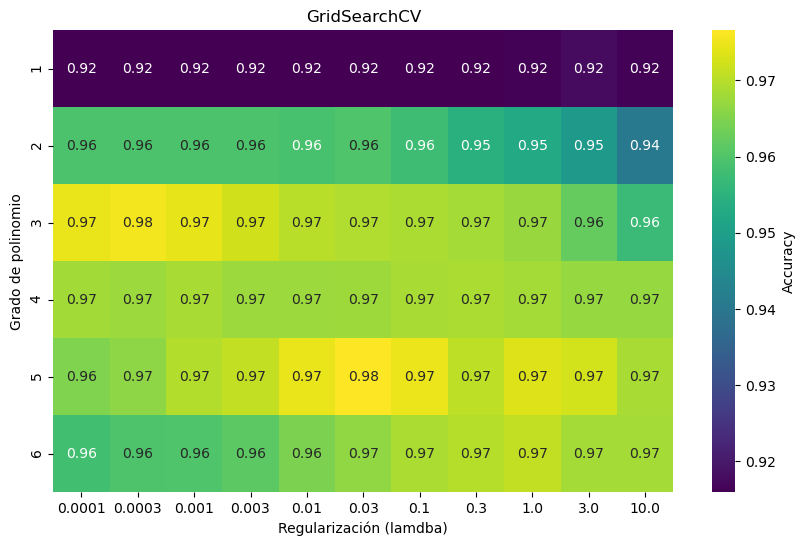

Porcentaje de acierto en los datos de prueba para el modelo con los mejores hiperparámetros: 98.24%


In [26]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy:", grid_search.best_score_)

# Mostramos los resultados
mostrar_panda_y_graf(grid_search)

X_test_rfe = rfe.transform(X_test)
y_pred = grid_search.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
print(f'Porcentaje de acierto en los datos de prueba para el modelo con los mejores hiperparámetros: {round(accuracy * 100, 2)}%')

En este caso se han seleccionado 5 características y se ha probado con los siguientes hiperparámetros:
- grados polinomio: [1, 2, 3, 4, 5, 6]
- lambda: [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
Los mejores hiperparámetros encontrados fueron un grado de polinómio 5 y un valor de C de 100 lo que implica un valor de lamdba 1/100 = 0.01. En la fase de testeo en el que obtenemos la capacidad de generalización del modelo se obtiene un porcentaje de acierto de 98.01 respecto a 96.14% obtenido en la regresión logística sin RFE.

RFE ha permitido obtener las características más relevantes a la hora de clasificar el apruebo o rechazo del prétamo para poder entrenar un modelo de mayor grado de polinomio y ajustarse a los datos para poder obtener una generalización con mayor accuracy.

Los atributos seleccionados por RFE fueron ['education', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score'], se puede corresponder a los parámetros que un humano escogería si tuviese que excluir otros parámetros. Otros parámetros como por ejemplo 'luxury_assets_value' (El valor total de los bienes de lujo del solicitante) tienen menos relevancia que la cantidad de préstamo que se pide, en cuánto tiempo se pretende devolver, etc.

Como curiosidad se ha preguntado a chat-gpt qué 5 características escogería aportandole la infomación de la tabla en el apartado de [Descripcion del problema](#Descripcion-del-problema) y ha respondido lo siguiente:
- Cibil Score
- Income Annum
- Loan Amount
- Loan Term
- No of Dependents

Lo cual coinciden todas menos education que ha escogido RFE respecto a No of Dependents que ha escogido chat-gpt.

### Naive Bayes
Este problema comprenderá el modo de predecir aquellos atributos que son categoricos y numéricos para poder diferenciarlos bien, dado que harían falta dos modelos de NaiveBayes, para poder obtener la primera clasificación contando únicamente con todos los atributos numéricos (clasificador GaussianNB)y otro modelo con los atributos categóricos (clasificador CategoricalNB), pero requerimos de una única predicción final, se estudirá que función de voto funcionará mejor.

In [27]:
def concatenateDecision(y1, y2, modo = 'min', w = np.array([])):
    f = {'min': np.minimum(y1, y2), 'max': np.maximum(y1, y2), 'ponderado': lambda y1, y2, w : np.array([y1, y2]).dot(w.T)}
    if modo == 'ponderado':
        if w.size == 2: return f['ponderado'](y1, y2, w)
        raise ValueError("El peso w debe ser un array de tamaño 2 para el modo 'ponderado'.")
    return f[modo]

index_numerical_features, index_categorical_features = np.array(
    [nombres_atributos.get_loc(key) for key in numerical_features]
),  np.array(
    [nombres_atributos.get_loc(key) for key in categorical_features]
)

X_train, X_test, X_val, y_train, y_test, y_val = dataset['MinMax']
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)
print('A continuacion mostramos el ACCURACY obntenido en distintos casos:\n\n')

print("Distinguiremos atributos categoricos y numericos para hayar 2 clasificaciones, despues se hará la concatenacion o voto para hayar una unica clasificacion: \n")
nb_numerical, nb_categorical = GaussianNB(), CategoricalNB()
nb_numerical.fit(X_train[:,index_numerical_features], y_train)
nb_categorical.fit(X_train[:, index_categorical_features], y_train)
y_numerical, y_categorical = nb_numerical.predict(X_test[:,index_numerical_features]), nb_categorical.predict(X_test[:,index_categorical_features])
y_pred = concatenateDecision(
    y_numerical, 
    y_categorical
)
d = {'y_pred_Categorica':f'{round(accuracy_score(y_test, y_categorical)*100, 2)}%', 'y_pred_Numerica': f'{round(accuracy_score(y_test, y_numerical)*100, 2)}%', 'y_predTotal': f'{round(accuracy_score(y_test, y_pred)*100,2)}%'}
print('Precisión del modelo con voto Min:')
print(d)

y_pred = concatenateDecision(
    y_numerical, 
    y_categorical,
    modo = 'max'
)
d = {'y_pred_Categorica':f'{round(accuracy_score(y_test, y_categorical)*100, 2)}%', 'y_pred_Numerica': f'{round(accuracy_score(y_test, y_numerical)*100, 2)}%', 'y_predTotal': f'{round(accuracy_score(y_test, y_pred)*100,2)}%'}
print('Precisión del modelo con voto Max')
print(d)

print('\nAhora distinguimos un segundo caso:\n')

index_numerical_feature = np.array(
    [nombres_atributos.get_loc(key) for key in ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'no_of_dependents']]
)
nb_numerical = GaussianNB()
nb_numerical.fit(X_train[:,index_numerical_features], y_train)
y_numerical = nb_numerical.predict(X_test[:,index_numerical_features])
precision = accuracy_score(y_test, y_numerical)
print(f'Precisión del modelo con atributos esenciales [income_annum, loan_amount, loan_term, cibil_score, no_of_dependents]= : {round(precision*100, 2)}%')



print('\nDistinguimos un tercer caso:\n')

nb_numerical = GaussianNB()
nb_numerical.fit(X_train, y_train)
y_pred = nb_numerical.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo tratatando a todos los atributos como numericos con una unica clasificacion (GaussianNB): {round(precision*100, 2)}%')

A continuacion mostramos el ACCURACY obntenido en distintos casos:


Distinguiremos atributos categoricos y numericos para hayar 2 clasificaciones, despues se hará la concatenacion o voto para hayar una unica clasificacion: 

Precisión del modelo con voto Min:
{'y_pred_Categorica': '63.11%', 'y_pred_Numerica': '93.91%', 'y_predTotal': '93.91%'}
Precisión del modelo con voto Max
{'y_pred_Categorica': '63.11%', 'y_pred_Numerica': '93.91%', 'y_predTotal': '63.11%'}

Ahora distinguimos un segundo caso:

Precisión del modelo con atributos esenciales [income_annum, loan_amount, loan_term, cibil_score, no_of_dependents]= : 93.91%

Distinguimos un tercer caso:

Precisión del modelo tratatando a todos los atributos como numericos con una unica clasificacion (GaussianNB): 94.03%


Conclusión: Indica que el problema se puede abordar únicamente con los atributos [income_annum, loan_amount, loan_term, cibil_score, no_of_dependents] y seguiría proporcionando buenos resultados. Y mejor aún, en este dataset y partición, se podría taratar a los categóricos como númericos ya que nos produce un mayor accuracy.

### Redes neuronales
Vamos a implementar el clasificador de perceptrón multicapa (MLP) de scikit-learn con diferentes hiperparámetros a optimizar. Se van a estudiar la combinación de diferentes funciones de activación, tasas de aprendizaje alpha y tamaños de las capas ocultas.

In [28]:
from sklearn.neural_network import MLPClassifier

np.random.seed(42)

# Definimos el clasificador MLP
mlp = MLPClassifier(max_iter=600, random_state=42)

# Definimos los hiperparámetros a ajustar
param_grid = {
    'hidden_layer_sizes': [(11,), (50,), (11, 50), (50, 50)],
    'activation': ['logistic', 'relu', 'tanh'],
    'alpha': [0.001, 0.01, 0.1],
}

# Configuramos la búsqueda exhaustiva con validación cruzada
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Realizamos la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy en los datos de prueba:", accuracy)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (11, 50)}
Accuracy en los datos de prueba: 0.9765807962529274


In [29]:
pd.set_option('display.width', 1000)
results = grid_search.cv_results_

df_results = pd.DataFrame(results)
df_results = df_results.rename(columns={'mean_test_score': 'accuracy'})

print(df_results[['params', 'accuracy']])


                                               params  accuracy
0   {'activation': 'logistic', 'alpha': 0.001, 'hi...  0.916253
1   {'activation': 'logistic', 'alpha': 0.001, 'hi...  0.915960
2   {'activation': 'logistic', 'alpha': 0.001, 'hi...  0.917131
3   {'activation': 'logistic', 'alpha': 0.001, 'hi...  0.916838
4   {'activation': 'logistic', 'alpha': 0.01, 'hid...  0.916545
5   {'activation': 'logistic', 'alpha': 0.01, 'hid...  0.916253
6   {'activation': 'logistic', 'alpha': 0.01, 'hid...  0.917131
7   {'activation': 'logistic', 'alpha': 0.01, 'hid...  0.916838
8   {'activation': 'logistic', 'alpha': 0.1, 'hidd...  0.916838
9   {'activation': 'logistic', 'alpha': 0.1, 'hidd...  0.916545
10  {'activation': 'logistic', 'alpha': 0.1, 'hidd...  0.916545
11  {'activation': 'logistic', 'alpha': 0.1, 'hidd...  0.915667
12  {'activation': 'relu', 'alpha': 0.001, 'hidden...  0.947584
13  {'activation': 'relu', 'alpha': 0.001, 'hidden...  0.956075
14  {'activation': 'relu', 'alpha': 0.00

### K-means

Al considerar la aplicación de K-means en el contexto de un problema con solo dos clases, nos aventuramos en la exploración de un enfoque de aprendizaje no supervisado para la agrupación de datos. La idea detrás de K-means es asignar instancias de datos a k clusters, donde k es un parámetro predefinido que representa el número deseado de grupos. En nuestro caso, podríamos establecer k en 2, ya que existen solo dos clases.

Sin embargo, es importante destacar que, a pesar de la simplicidad aparente de la tarea, los resultados obtenidos mediante K-means pueden no ser óptimos o interpretables directamente en términos de las clases reales del problema. Esto se debe a que K-means opera mediante la minimización de la varianza intra-cluster, buscando agrupar instancias de datos en clusters que minimicen la distancia intra-cluster.

Dado que K-means no está diseñado específicamente para la tarea de clasificación y no utiliza información de etiquetas de clase durante el entrenamiento, su rendimiento puede ser limitado en problemas de clasificación binaria. Las limitaciones surgen de la naturaleza misma del algoritmo, que se enfoca en la estructura de los datos en lugar de en las clases específicas.

In [30]:
for column in dataset.keys():
    X_train, X_test, X_val, y_train, y_test, y_val = dataset[column]
    X_train = np.concatenate((X_train, X_val), axis=0)
    y_train = np.concatenate((y_train, y_val), axis=0)

    modelo_kmeans = KMeans(n_clusters=2, random_state=42)
    modelo_kmeans.fit(X_train)
    clusters = modelo_kmeans.predict(X_test)
    accuracy = accuracy_score(y_test, clusters)
    print('\nPara el dataset {}'.format(column))
    print(f'Accuracy: {round(accuracy*100, 2)}%')


Para el dataset Z
Accuracy: 49.06%

Para el dataset MinMax
Accuracy: 49.3%


### Ensembles

En la búsqueda de maximizar el rendimiento de nuestro modelo en un problema de clasificación binaria, nos embarcamos en la exploración de técnicas de ensamblado. La premisa fundamental detrás de los ensembles es combinar las fortalezas de varios modelos para obtener un rendimiento colectivo superior. En este contexto, evaluaremos y compararemos diferentes técnicas de ensamblado, seleccionando la más efectiva en función del dataset de validación.

Selección Basada en Validación:
El proceso de selección del mejor ensamblador se llevará a cabo meticulosamente utilizando el conjunto de validación. Este conjunto desempeña un papel crucial al permitir la evaluación de diversos ensembles que optimizan el rendimiento en términos de precisión y generalización.

Tipos de Ensambladores Evaluados:

DecisionTree:
Se utilizarán árboles de decisión como componentes base. Aunque individualmente pueden estar propensos al sobreajuste, su inclusión en el ensemble será parte de una estrategia para mitigar este problema.

Bagging:
La técnica de Bagging, que implica entrenar múltiples instancias del mismo modelo con subconjuntos aleatorios del conjunto de entrenamiento, será evaluada por su capacidad para mejorar la estabilidad y reducir la varianza.

Boosting:
Se explorará el método de Boosting, que adapta el peso de las instancias mal clasificadas en iteraciones anteriores, mejorando así la capacidad del modelo para aprender de sus errores.

RandomForest:
La combinación de múltiples árboles de decisión en un bosque aleatorio proporcionará una evaluación adicional. La aleatoriedad en la construcción de estos árboles contribuye a una mayor diversidad y robustez del modelo final.

              Train Accuracy  Validation Accuracy  Test Accuracy
DecisionTree           100.0            98.477752      98.009368
Bagging                100.0            98.711944      98.711944
Boosting               100.0            98.477752      97.658080
RandomForest           100.0            98.126464      98.009368
Mejor clasificador: Bagging, Precisión en Validación: 98.71%


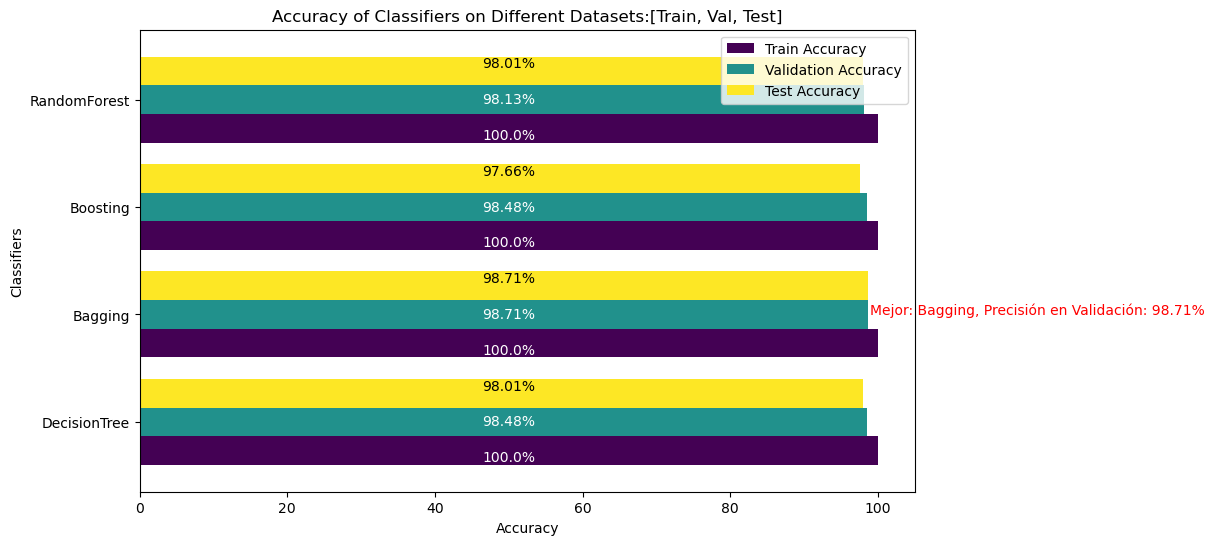

In [35]:
clasificadores = [DecisionTreeClassifier(criterion='entropy', random_state=12), 
                  BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', random_state=12), n_estimators=15, random_state=12),
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', random_state=12), n_estimators=15, random_state=12),
                  RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=15, random_state=12)]
nombres, nombresC = ['DecisionTree', 'Bagging', 'Boosting', 'RandomForest'], ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
X_train, X_val, X_test, y_train, y_val, y_test = dataset['MinMax']
best_val = 0
precisiones = []
for i, clasificador in enumerate(clasificadores):
    clasificador.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, clasificador.predict(X_train))*100
    acc_val = accuracy_score(y_val, clasificador.predict(X_val))*100
    acc_test = accuracy_score(y_test, clasificador.predict(X_test))*100
    if acc_val > best_val:  best_val, best_classifier, best_test = acc_val, nombres[i], acc_test
    precisiones.append((acc_train, acc_val, acc_test))

df = pd.DataFrame(precisiones, columns=nombresC, index=nombres)
print(df)
print(f"Mejor clasificador: {best_classifier}, Precisión en Validación: {np.round(best_test, 2)}%")


ax = df.plot(kind='barh', figsize=(10, 6), colormap='viridis', width=0.8)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Classifiers')
ax.set_title('Accuracy of Classifiers on Different Datasets:[Train, Val, Test]')
ax.text(best_test + 0.2, df.index.get_loc(best_classifier), f'Mejor: {best_classifier}, Precisión en Validación: {np.round(best_test, 2)}%', color='red')
for col in df.columns:
    if col != 'Mejor clasificador':
        for j, v in enumerate(df[col]):
            offset = j - 1/3 if col == 'Train Accuracy' else j if col == 'Validation Accuracy' else j +1/ 3
            color = 'white' if col in ['Train Accuracy', 'Validation Accuracy'] else 'black'
            ax.text(100.0/ 2, offset, f'{np.round(v, 2)}%', color=color, ha='center', va='center')
plt.show()


El mejor clasificador será el bagging.

### OVA
En el escenario en el que solo contamos con dos clases de salida, la estrategia OVA, también conocida como One-vs-All, se convierte en una elección natural para abordar el problema de clasificación binaria. Al implementar OVA con diversos kernels y evaluándolo en conjuntos de validación y prueba, se adopta una aproximación que simplifica la tarea al dividirla en dos problemas distintos.

La esencia de la estrategia OVA radica en la creación de múltiples clasificadores, donde cada clasificador se entrena para distinguir una de las clases específicas de la otra. En el contexto de un problema de clasificación binaria, tendremos un clasificador para la Clase 1 y otro para la Clase 2. Cada clasificador base generará una predicción sobre la probabilidad de pertenencia a su clase designada.

La diversidad de kernels utilizados en este enfoque proporciona versatilidad al modelo, permitiendo la adaptación a patrones no lineales o complejidades presentes en los datos. Los kernels pueden transformar el espacio de características, facilitando así la captura de relaciones más intrincadas entre las variables.

Durante la fase de clasificación, cada clasificador base emite una predicción y la clase asociada al clasificador que proporciona la probabilidad más alta se considera como la predicción final del modelo OVA. Esta estrategia de votación y selección de la clase más probable simplifica la tarea de clasificación binaria, y su eficacia se ha demostrado en numerosos problemas de este tipo.

En resumen, al utilizar la estrategia OVA en un problema de clasificación binaria con diferentes kernels, se aprovecha la capacidad de esta técnica para dividir la tarea en subproblemas más manejables, permitiendo a cada clasificador base enfocarse en la discriminación de una clase específica. La elección de kernels diversos amplía la flexibilidad del modelo para adaptarse a la complejidad inherente de los datos, proporcionando así una solución más completa y eficaz al problema de clasificación binaria.

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, X_val, y_train, y_test, y_val = dataset['Z']
clasificadores = {
    'linear': OneVsRestClassifier(estimator=SVC(kernel='linear')),
    'poly': OneVsRestClassifier(estimator=SVC(kernel='poly', degree=2)),
    'rbf': OneVsRestClassifier(estimator=SVC(kernel='rbf', random_state=12)),
    'sigmoid': OneVsRestClassifier(estimator=SVC(kernel='sigmoid'))
}
bestClf, bestAccVal, bestAccTest = None, 0.0, 0.0
accs_Val = []
accs_Test = []
for kernel in clasificadores.keys():
    ova_classifier = clasificadores[kernel]
    ova_classifier.fit(X_train, y_train)
    accuracy_val, accuracy_test = accuracy_score(y_val, ova_classifier.predict(X_val)), accuracy_score(y_test, ova_classifier.predict(X_test))
    accs_Val.append(round(accuracy_val*100, 2))
    accs_Test.append(round(accuracy_test*100, 2))
    if bestAccVal < accuracy_val: bestClf, bestAccVal, bestAccTest = kernel, accuracy_val, accuracy_test
print(f'El mejor kernel de OVA es {bestClf} con accuracy en validación = {round(bestAccVal*100, 2)}% y en test = {round(bestAccTest*100, 2)}%')
d = {'kernel': clasificadores.keys(),
     'acc_val': accs_Val,
     'acc_tes': accs_Test}
pd.DataFrame(d)

El mejor kernel de OVA es rbf con accuracy en validación = 93.44% y en test = 93.09%


,kernel,acc_val,acc_tes
0,linear,91.92,92.51
1,poly,85.25,84.66
2,rbf,93.44,93.09
3,sigmoid,79.27,80.33


Estos son los resultados específicos para cada kernel. Puedes observar cómo el rendimiento varía según el tipo de kernel. El kernel RBF ha demostrado ser el más efectivo en este caso particular.
En resumen, el kernel RBF es el preferido debido a su mayor precisión tanto en el conjunto de validación como en el conjunto de prueba, en comparación con los otros kernels evaluados.

### OVO
Cuando solo hay dos clases en la salida (problema de clasificación binaria) y se elige utilizar la estrategia OVO (One-vs-One), el comportamiento del enfoque OVO se simplifica. En este caso, solo se requerirá un clasificador base para distinguir entre las dos clases disponibles. Aunque la estrategia OVO está diseñada para manejar problemas con más de dos clases, se adapta de manera natural a situaciones binarias, ya que sigue la misma lógica fundamental.

La diversidad de kernels utilizados en este escenario agrega una capa adicional de complejidad y capacidad de adaptación al modelo. Los kernels, al permitir la transformación de datos en espacios de características más complejos, pueden capturar patrones no lineales en conjuntos de datos que de otro modo serían difíciles de abordar.

In [33]:
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, X_val, y_train, y_test, y_val = dataset['Z']
clasificadores = {
    'linear': OneVsOneClassifier(estimator=SVC(kernel='linear')),
    'poly': OneVsOneClassifier(estimator=SVC(kernel='poly', degree=2)),
    'rbf': OneVsOneClassifier(estimator=SVC(kernel='rbf', random_state=12)),
    'sigmoid': OneVsOneClassifier(estimator=SVC(kernel='sigmoid'))
}
bestClf, bestAccVal, bestAccTest = None, 0.0, 0.0
accs_Val = []
accs_Test = []
for kernel in clasificadores.keys():
    ovo_classifier = clasificadores[kernel]
    ovo_classifier.fit(X_train, y_train)
    accuracy_val = accuracy_score(y_val, ovo_classifier.predict(X_val))
    accuracy_test = accuracy_score(y_test, ovo_classifier.predict(X_test))
    accs_Val.append(round(accuracy_val*100, 2))
    accs_Test.append(round(accuracy_test*100, 2))
    if bestAccVal < accuracy_val:   bestClf, bestAccVal, bestAccTest = kernel, accuracy_val, accuracy_test
print(f'El mejor kernel de OVO es {bestClf} con accuracy en validación = {round(bestAccVal*100, 2)}% y en test = {round(bestAccTest*100, 2)}%')
d = {
    'kernel': list(clasificadores.keys()),
    'acc_val': accs_Val,
    'acc_test': accs_Test
}
pd.DataFrame(d)


El mejor kernel de OVO es rbf con accuracy en validación = 93.44% y en test = 93.09%


,kernel,acc_val,acc_test
0,linear,91.92,92.51
1,poly,85.25,84.66
2,rbf,93.44,93.09
3,sigmoid,79.27,80.33


Nos ha dado un resultado parecido a el OVA que hemos aplicado con anterioridad.

### Conclusion

En la selección de los mejores hiperparámetros para los diferentes modelos de aprendizaje automático se ha tenido en cuenta el accuracy en los datos de validación.

Al seleccionar el mejor modelo, observamos el rendimiento en el conjunto de prueba. La razón es que el conjunto de prueba simula los datos no vistos que el modelo encontraría en un entorno del mundo real.

En resumen, tras la selección de los mejores hiperparámetros se han obtenido los siguientes resultados en el conjunto de pruebas:

- Regresión logística con regularización:  lambda 3,  grado de polinómio 3 y un accuracy en test de 94.85%. 
- Regresión logística con regularización utilizando RFE: lambda 0.03, grado polinomio 5 y un accuracy en test de 98.24% 
- Naive bayes: test (GaussianNB): accuracy en test de 94.03%
- Redes neuronales: acc en test de 0.97658%, función de activación': 'relu', alpha: 0.001, hidden_layer_sizes: (11, 50)
- K-means: 49.3% accuracy en test
- Ensembles:
    - DecisionTree 98.009368% acc en test
    - Bagging 98.711944% acc en test
    - Boosting 97.658080% acc en test
    - RandomForest 98.009368% acc en test
- kernel de OVA es rbf con accuracy en test = 93.09%
- kernel de OVO es rbf con accuracy en test = 93.09%

Finalmente, nuestro análisis concluye que el modelo basado en la técnica de Bagging logra el mayor accuracy en los datos de prueba con un 98.71%. Esto significa que ha demostrado ser el más robusto y efectivo para generalizar, es decir, en realizar predicciones precisas en datos no vistos, lo cual es idóneo para aplicaciones del mundo real.


### Posibles lineas de trabajo futuro para mejorar los resultados
- Exploración de técnicas de normalización: Se podría investigar y comparar diferentes técnicas de normalización de datos para evaluar su impacto en el rendimiento de los modelos. La variación en los resultados podría deberse a la sensibilidad de algunos modelos a las escalas de las características, y la optimización de la normalización podría conducir a mejoras significativas.
- Mitigación de falsos positivos o falsos negativos: La elección entre minimizar falsos positivos, falsos negativos, o encontrar un equilibrio, depende de los objetivos y riesgos específicos del negocio.
    - Si minimizar los falsos positivos es crucial, se busca evitar aprobar préstamos a personas que puedan representar un riesgo elevado de impago.
    - Si minimizar los falsos negativos es más importante, se busca evitar rechazar a solicitantes que podrían ser buenos pagadores, para no perder oportunidades de negocio.
- Optimización de hiperparámetros específicos: Utilizando Google Colab, se puede llevar a cabo una búsqueda exhaustiva de hiperparámetros específicos para cada modelo priorizando aquellos que influyen directamente en las decisiones de aprobación o rechazo de préstamos. Esta aproximación tiene el potencial de generar modelos más precisos y adaptados al problema en cuestión, aprovechando la potencia computacional y la flexibilidad de Google Colab.
- Exploración de nuevas técnicas: es posible que existan técnicas no estudiadas que permitan ajustarse a los datos mejorando la generalización del modelo.

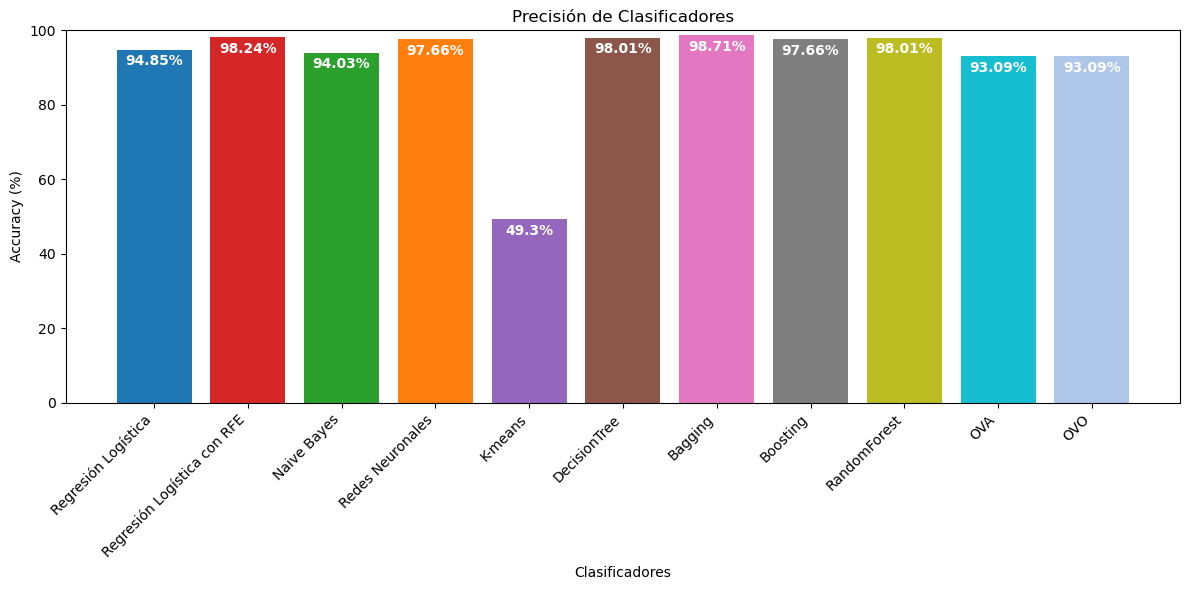

In [43]:
# Gráfica resumen
import matplotlib.pyplot as plt

clasificadores = ['Regresión Logística', 'Regresión Logística con RFE', 'Naive Bayes', 'Redes Neuronales', 'K-means', 'DecisionTree', 'Bagging', 'Boosting', 'RandomForest', 'OVA', 'OVO']
accuracy = [94.85, 98.24, 94.03, 97.66, 49.3, 98.01, 98.71, 97.66, 98.01, 93.09, 93.09]

colores = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8']

plt.figure(figsize=(12, 6))
bars = plt.bar(clasificadores, accuracy, color=colores)
plt.ylim(0, 100)  # Establecer límites en el eje y

plt.xlabel('Clasificadores')
plt.ylabel('Accuracy (%)')
plt.title('Precisión de Clasificadores')

plt.xticks(rotation=45, ha='right')

# Nueva parte para colocar los textos dentro de las barras
for bar, value in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, value - 5, f'{value}%', ha='center', va='bottom', color='white', weight='bold')

plt.tight_layout()
plt.show()
